In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
#initial position
x_init = 0
y_init = 0

x = x_init
y = y_init

#initial angle
theta_init = 45

In [3]:
#robot characteristics (metres between wheels)
wheelbase = 0.25

In [4]:
#list for positions
pos = []

In [5]:
#reset time
t = 0

In [6]:
#ticks per meter
tpm = 1000

In [7]:
#robot velocity (m/s)
v = 0.5

In [8]:
H_k = ([1, 0], [0, 1])
print(H_k)


([1, 0], [0, 1])


In [63]:
#distance to travel (m)
d_goal = 5
d_trav = 0
#reset time
t = 0
#reset pos
x = x_init
y = y_init
pos = []

In [64]:
print(d_trav, t, x, y)
pos.append((x,y))
while d_trav < d_goal:
    d_trav, t = distance_update(d_trav, t)
    x,y = update_pos(x, y)
    pos.append((x,y))
    print(d_trav, t, x, y)

0 0 0 0
x before:  0
v before:  0.5
delta_x:  0.3535533905932738
0.5 1 0.3535533905932738 0.35355339059327373
x before:  0.3535533905932738
v before:  0.5
delta_x:  0.3535533905932738
1.0 2 0.7071067811865476 0.7071067811865475
x before:  0.7071067811865476
v before:  0.5
delta_x:  0.3535533905932738
1.5 3 1.0606601717798214 1.0606601717798212
x before:  1.0606601717798214
v before:  0.5
delta_x:  0.3535533905932738
2.0 4 1.4142135623730951 1.414213562373095
x before:  1.4142135623730951
v before:  0.5
delta_x:  0.3535533905932738
2.5 5 1.7677669529663689 1.7677669529663687
x before:  1.7677669529663689
v before:  0.5
delta_x:  0.3535533905932738
3.0 6 2.121320343559643 2.1213203435596424
x before:  2.121320343559643
v before:  0.5
delta_x:  0.3535533905932738
3.5 7 2.474873734152917 2.474873734152916
x before:  2.474873734152917
v before:  0.5
delta_x:  0.3535533905932738
4.0 8 2.8284271247461907 2.82842712474619
x before:  2.8284271247461907
v before:  0.5
delta_x:  0.353553390593273

In [11]:
#this function updates the current distance travelled and time elapsed by the moving robot
def distance_update(d, t):
    d = d + v
    t = t + 1
    return (d, t)

In [13]:
def update_pos(x,y):
    delta_x = (v * (math.cos(math.radians(theta_init))))
    delta_y = (v * (math.sin(math.radians(theta_init))))
    print("delta_x: ", delta_x)
    return (x + delta_x, y + delta_y)

In [ ]:
math.cos(math.radians(45))

In [65]:
print(pos)

[(0, 0), (0.3535533905932738, 0.35355339059327373), (0.7071067811865476, 0.7071067811865475), (1.0606601717798214, 1.0606601717798212), (1.4142135623730951, 1.414213562373095), (1.7677669529663689, 1.7677669529663687), (2.121320343559643, 2.1213203435596424), (2.474873734152917, 2.474873734152916), (2.8284271247461907, 2.82842712474619), (3.1819805153394647, 3.181980515339464), (3.5355339059327386, 3.5355339059327378)]


In [81]:
L_pos = []
itr = 0
while itr < len(pos):
    x_wheel_pos = (pos[itr][0] - (wheelbase/2)*math.cos(math.radians(90-theta_init)))
    y_wheel_pos = (pos[itr][1] + (wheelbase/2)*math.sin(math.radians(90-theta_init)))
    L_pos.append((x_wheel_pos,y_wheel_pos))
    itr+=1

In [79]:
R_pos = []
itr = 0
while itr < len(pos):
    x_wheel_pos = (pos[itr][0] + (wheelbase/2)*math.cos(math.radians(90-theta_init)))
    y_wheel_pos = (pos[itr][1] - (wheelbase/2)*math.sin(math.radians(90-theta_init)))
    R_pos.append((x_wheel_pos,y_wheel_pos))
    itr+=1

In [56]:
print(L_pos)

[(0.26516504294495535, 0.44194173824159216), (0.6187184335382291, 0.795495128834866), (0.9722718241315029, 1.1490485194281397), (1.3258252147247767, 1.5026019100214134), (1.6793786053180504, 1.8561553006146871), (2.0329319959113246, 2.2097086912079607), (2.3864853865045985, 2.563262081801234), (2.7400387770978725, 2.916815472394508), (3.0935921676911464, 3.270368862987782), (3.4471455582844204, 3.623922253581056)]


In [73]:
print(pos)

[(0, 0), (0.3535533905932738, 0.35355339059327373), (0.7071067811865476, 0.7071067811865475), (1.0606601717798214, 1.0606601717798212), (1.4142135623730951, 1.414213562373095), (1.7677669529663689, 1.7677669529663687), (2.121320343559643, 2.1213203435596424), (2.474873734152917, 2.474873734152916), (2.8284271247461907, 2.82842712474619), (3.1819805153394647, 3.181980515339464), (3.5355339059327386, 3.5355339059327378)]


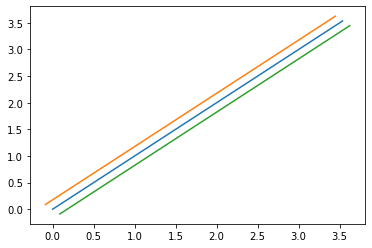

In [82]:
plt.figure()
plt.plot(*zip(*pos))
x_L,y_L = zip(*L_pos)
plt.plot(x_L,y_L)
x_R,y_R = zip(*R_pos)
plt.plot(x_R,y_R)

0 0
0.3535533905932738 0.35355339059327373
0.7071067811865476 0.7071067811865475
1.0606601717798214 1.0606601717798212
1.4142135623730951 1.414213562373095
1.7677669529663689 1.7677669529663687
2.121320343559643 2.1213203435596424
2.474873734152917 2.474873734152916
2.8284271247461907 2.82842712474619
3.1819805153394647 3.181980515339464
3.5355339059327386 3.5355339059327378


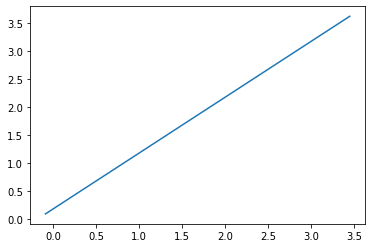

In [68]:
L_pos = []
itr = 0
while itr < len(pos):
    print(pos[itr][0], pos[itr][1])
    x_wheel_pos = (pos[itr][0] - 0.08838834764831843)
    y_wheel_pos = (pos[itr][1] + 0.08838834764831843)
    L_pos.append((x_wheel_pos,y_wheel_pos))
    itr+=1
x_L,y_L = zip(*L_pos)
plt.plot(x_L,y_L)

In [69]:
print(L_pos)

[(-0.08838834764831843, 0.08838834764831843), (0.26516504294495535, 0.44194173824159216), (0.6187184335382292, 0.795495128834866), (0.9722718241315029, 1.1490485194281397), (1.3258252147247767, 1.5026019100214134), (1.6793786053180504, 1.8561553006146871), (2.0329319959113246, 2.2097086912079607), (2.3864853865045985, 2.563262081801234), (2.7400387770978725, 2.916815472394508), (3.0935921676911464, 3.270368862987782), (3.4471455582844204, 3.623922253581056)]
